# Tic Tac Toe Exploration
**Sophia, Mac-I and Jacob**
In this notebook, we're going to be exploring implementing an algorithm that learns how to play tic-tac-toe using reinforcement learning. The inspiration for this came from an example in "Reinforcement Learning: An Introduction", by Richard Sutton and Andrew Barto. [Link here!](https://webdocs.cs.ualberta.ca/~sutton/book/the-book.html).

In [1]:
%matplotlib inline
import random
from copy import copy, deepcopy
import itertools
import csv
import matplotlib.pyplot as plt
import random

/Users/Sophia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In this case, we're going to define a board as a list of length 9, where the first three elements are the top row, the next the represent the middle row and so on. In this case we'll use X, O, and \_ as our possible elements in this list, with \_ representing an empty space on the board.  

## Functions for implementing Tic Tac Toe
These are functions that aren't really a part of the reinforcement learning part of this notebook, but we need them implemented before we can play tic-tac toe. These are implementations of the game, rather than an algorithm. 

First let's write a function to check if a particular gamestate is a winning gamestate, and if so, for which player. 

In [2]:
def isWinningGamestate(gamestate):
    possibleWaysToWin = [
        [0,1,2],
        [3,4,5],
        [6,7,8],
        [0,3,6],
        [1,4,7],
        [2,5,8],
        [0,4,8],
        [6,4,2],
    ]
    numWinners = 0
    winner = ''
    for poss in possibleWaysToWin:
        if ((gamestate[poss[0]] != '_') and
            (gamestate[poss[0]] == gamestate[poss[1]]) and 
            (gamestate[poss[1]] == gamestate[poss[2]])):
            numWinners+= 1
            winner = gamestate[poss[0]]
    
    return (numWinners, winner)

Now that we've initialized our table, let's write a function that given a current game state and a player whose turn it is, gives us all the possible next game states. 

In [51]:
def getNextGameStates (gameState, player):
    blankSpots = [i for i,slot in enumerate(gameState) if slot=='_']
    
    nextStates = []
    for blankSpot in blankSpots:
        tempNextState = copy(gameState)
        tempNextState[blankSpot] = player
        nextStates.append(tempNextState)
    
    return nextStates

In [52]:
getNextGameStates(['_']*9,'X')

[['X', '_', '_', '_', '_', '_', '_', '_', '_'],
 ['_', 'X', '_', '_', '_', '_', '_', '_', '_'],
 ['_', '_', 'X', '_', '_', '_', '_', '_', '_'],
 ['_', '_', '_', 'X', '_', '_', '_', '_', '_'],
 ['_', '_', '_', '_', 'X', '_', '_', '_', '_'],
 ['_', '_', '_', '_', '_', 'X', '_', '_', '_'],
 ['_', '_', '_', '_', '_', '_', 'X', '_', '_'],
 ['_', '_', '_', '_', '_', '_', '_', 'X', '_'],
 ['_', '_', '_', '_', '_', '_', '_', '_', 'X']]

## Implementing the Reinforcement Learning

Now, let's create a function that creates the game state table. 

Note: this function assumes that Xs always go first. 

Additionally, we're going to do this by creating all possible combinations of Os, Xs, and underscores, and then filtering out all impossible game states.

In [3]:
def createGameStateTable (player):
    allStates = list(itertools.product(['X','O','_'], repeat =9))
    gameStateTable = {}
    for state in allStates:
        stateStr = ''.join(state)
        
        Xcount = state.count('X')
        Ocount = state.count('O')     
        
        if ((Xcount == Ocount) or ((Xcount - 1) == Ocount)):
            numWinners,winner = isWinningGamestate(state)
            if (numWinners == 0):
                blankCount = state.count('_')
                if (blankCount == 0):
                    gameStateTable[stateStr] = 0
                else:
                    gameStateTable[stateStr] = 0.5
            elif (numWinners == 1):
                gameStateTable[stateStr] = int(winner==player)
    return gameStateTable

In [4]:
createGameStateTable('X')

{'XOOOOXXX_': 0.5,
 'XOOOOXXXX': 1,
 'OXX_X_XOO': 1,
 'OO_XO__XX': 0.5,
 'XXOXX__OO': 0.5,
 'O_OX____X': 0.5,
 '__OOX_OXX': 0.5,
 '_X____OOX': 0.5,
 '_____XXO_': 0.5,
 'XXO_OOXX_': 0.5,
 '_O_X_XX_O': 0.5,
 'XXO_OOXXO': 0,
 'OXOO_X__X': 0.5,
 'X_O__XX_O': 0.5,
 'O_XO_O_XX': 0.5,
 'OXX___OX_': 0.5,
 'O_X__OX_X': 0.5,
 'O_X__OX__': 0.5,
 'XOXX_OO_X': 0.5,
 'OXX___OXO': 0.5,
 'XOXX_OO__': 0.5,
 '_OOXXOXOX': 0.5,
 'OOXO__X_X': 0.5,
 'O_OX_X___': 0.5,
 'O_OX_X__X': 0.5,
 '_OXXXO_O_': 0.5,
 '_OXXXO_OX': 0.5,
 'OXXX_OOOX': 0.5,
 'XOXO_XX_O': 0.5,
 'XO_O___XX': 0.5,
 '__OOX__X_': 0.5,
 'O_XO_XX__': 0.5,
 '__OXXO___': 0.5,
 'XX_X__OOO': 0,
 '__OOX__XX': 0.5,
 '__O_XOXXO': 0,
 '_XXOOO_XX': 0,
 'O_XO_XX_O': 0.5,
 'XX_X__OO_': 0.5,
 'O_OXXOXXO': 0,
 'O_XXXOXO_': 1,
 'OX_OXXXO_': 0.5,
 'O_OXXOXX_': 0.5,
 'O_XXXOXOO': 1,
 '_XO_O__X_': 0.5,
 'OX_OXXXOO': 0.5,
 'O___XOXOX': 0.5,
 'O____XOX_': 0.5,
 'O____XOXX': 0.5,
 'OX_X___XO': 0.5,
 '__X_OXO__': 0.5,
 'O___OXX_X': 0.5,
 'O___OXX__': 0.5,
 '__X_OXO_X

Now, let's try to play a game. For now, let's have the computer learn to play against a player that randomly places game pieces

In [35]:
#Initialize the board
board = ['_']*9
Players = ['O','X']
playerTurn = 0
statesDict = createGameStateTable('X')
numWinners, winner = isWinningGamestate(board)

#keeping track variables for the learner
lastLearningBoard = ''.join(['_']*9)
adjustWeightFactor = 0.5



while (numWinners == 0):
    print board
    # O's Turn... Move Randomly
    if (playerTurn == 1):
        playerTurn = 0
        blankSpots = [i for i,slot in enumerate(board) if slot=='_']
        
        placeToMove = random.choice(blankSpots)
        board[placeToMove] = 'O'
       
    else:
        playerTurn = 1
        #Get all the next possible game states
        possStates = getNextGameStates(board, 'X')
        possWinning = []
        #Get the possibilities of winning for the next state
        for possState in possStates:
            stateStr = ''.join(possState)
            possWinning.append(statesDict[stateStr])
            
        #Get the best move(s) by our probability of winning
        maxReward = max(possWinning)
        bestMoves = []
        otherMoves = []
        for k,possWin in enumerate(possWinning):
            if (possWin == maxReward):
                bestMoves.append(possStates[k])
            else:
                otherMoves.append(possStates[k])
         
        isExploratory = 0
        
        if (len(otherMoves) > 0):
            #Are we being exploratory?
            isExploratory = random.random() > 0.8
        
        if (isExploratory):
            #Exploratory behavior
            board = list(random.choice(otherMoves))
            
        else:
            board = list(random.choice(bestMoves))
            
            oldProbW = statesDict[lastLearningBoard]
            newProbW = statesDict[''.join(board)]
            statesDict[lastLearningBoard] += adjustWeightFactor*(newProbW - oldProbW)
            print lastLearningBoard, statesDict[lastLearningBoard]
                    
            lastLearningBoard = ''.join(board)
   
     
    numWinners, winner = isWinningGamestate(board)
    
print board  
print "winner", winner

['_', '_', '_', '_', '_', '_', '_', '_', '_']
BEST MOVES
[['X', '_', '_', '_', '_', '_', '_', '_', '_'], ['_', 'X', '_', '_', '_', '_', '_', '_', '_'], ['_', '_', 'X', '_', '_', '_', '_', '_', '_'], ['_', '_', '_', 'X', '_', '_', '_', '_', '_'], ['_', '_', '_', '_', 'X', '_', '_', '_', '_'], ['_', '_', '_', '_', '_', 'X', '_', '_', '_'], ['_', '_', '_', '_', '_', '_', 'X', '_', '_'], ['_', '_', '_', '_', '_', '_', '_', 'X', '_'], ['_', '_', '_', '_', '_', '_', '_', '_', 'X']]
_________ 0.5
['_', '_', 'X', '_', '_', '_', '_', '_', '_']
['_', '_', 'X', '_', 'O', '_', '_', '_', '_']
BEST MOVES
[['X', '_', 'X', '_', 'O', '_', '_', '_', '_'], ['_', 'X', 'X', '_', 'O', '_', '_', '_', '_'], ['_', '_', 'X', 'X', 'O', '_', '_', '_', '_'], ['_', '_', 'X', '_', 'O', 'X', '_', '_', '_'], ['_', '_', 'X', '_', 'O', '_', 'X', '_', '_'], ['_', '_', 'X', '_', 'O', '_', '_', 'X', '_'], ['_', '_', 'X', '_', 'O', '_', '_', '_', 'X']]
__X______ 0.5
['_', 'X', 'X', '_', 'O', '_', '_', '_', '_']
['_', 'X', '

Now, let's play tons of games!

In [54]:
statesDict = createGameStateTable('X')
winningPercentage = []
drawPercentage = []
losingPercentage = []
totalPercentage = []

for j in range(100000):
    #Initialize the board
    board = ['_']*9
    Players = ['O','X']
    playerTurn = 0
    numWinners, winner = isWinningGamestate(board)

    #keeping track variables for the learner
    lastLearningBoard = ''.join(['_']*9)
    adjustWeightFactor = 0.1



    while ((numWinners == 0) and board.count('_') > 0):
        # O's Turn... Move Randomly
        if (playerTurn == 0):
            playerTurn = 1
            blankSpots = [i for i,slot in enumerate(board) if slot=='_']

            placeToMove = random.choice(blankSpots)
            board[placeToMove] = 'O'

        else:
            playerTurn = 0
            #Get all the next possible game states
            possStates = getNextGameStates(board, 'X')
            possWinning = []
            #Get the possibilities of winning for the next state
            for possState in possStates:
                stateStr = ''.join(possState)
                possWinning.append(statesDict[stateStr])

            #Get the best move by our probability of winning
            maxReward = max(possWinning)
            bestMoves = []
            otherMoves = []
            for k,possWin in enumerate(possWinning):
                if (possWin == maxReward):
                    bestMoves.append(possStates[k])
                else:
                    otherMoves.append(possStates[k])

            isExploratory = 0

            if (len(otherMoves) > 0):
                #Are we being exploratory?
                isExploratory = random.random() > 0.8

            if (isExploratory):
                #Exploratory behavior
                board = list(random.choice(otherMoves))

            else:
                board = list(random.choice(bestMoves))

                oldProbW = statesDict[lastLearningBoard]
                newProbW = statesDict[''.join(board)]
                statesDict[lastLearningBoard] += adjustWeightFactor*(newProbW - oldProbW)

                lastLearningBoard = ''.join(board)


        numWinners, winner = isWinningGamestate(board)

    if (j == 0):
        winningPercentage.append(int(winner=='X')*100)
        losingPercentage.append(int(winner=='O')*100)
        drawPercentage.append(int(winner =='')*100)
        
        #checking!
        totalPercentage.append((int(winner=='X')+int(winner=='O')+int(winner==''))*100)
    else:
        prevWinning = winningPercentage[j-1]
        newWinning = (prevWinning*(j) + int(winner=='X')*100)/(float(j+1))
        winningPercentage.append(newWinning)
        prevLosing = losingPercentage[j-1]
        newLosing = (prevLosing*(j) + int(winner=='O')*100)/(float(j+1))
        losingPercentage.append(newLosing)
        prevDraw = drawPercentage[j-1]
        newDraw = (prevDraw*(j) + int(winner=='')*100)/(float(j+1))
        drawPercentage.append(newDraw)
        
        #checking!
        totalPercentage.append(newWinning+newLosing+newDraw)
        

Now, let's plot our performance over time!

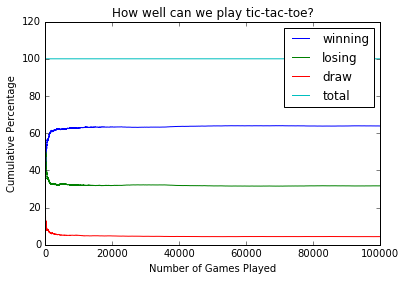

In [55]:
numGames = range(len(winningPercentage))
plt.plot(numGames, winningPercentage,
         numGames, losingPercentage,
         numGames, drawPercentage,
         numGames, totalPercentage)
plt.legend(['winning', 'losing', 'draw', 'total'])
plt.xlabel('Number of Games Played')
plt.ylabel('Cumulative Percentage')
plt.title('How well can we play tic-tac-toe?')